# Задание

Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных

Выполнил: Арзигиян Георгий Ашотович

Часть 2

4.	Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).

# Часть 2

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Аномальные значения

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

Датасет содержит данные о недвижимости, включая различные характеристики домов (площадь, количество комнат, год постройки и др.), для предсказания их конечной цены.

In [2]:
df = pd.read_csv('train.csv')

## Описательная статистика

In [3]:
column_data = df['GrLivArea']

desc = sm.stats.DescrStatsW(column_data)

# Рассчитываем необходимые метрики
mean = desc.mean
std_dev = desc.std
variance = desc.var
median = np.median(column_data)
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1
data_range = column_data.max() - column_data.min()

# Расчет аномалий (выбросов), используя метод межквартильного размаха
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
num_outliers = len(outliers)
percent_outliers = (num_outliers / len(column_data)) * 100

# Вывод результатов
print(f"Среднее: {mean:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Первый квартиль (Q1): {Q1:.4f}")
print(f"Третий квартиль (Q3): {Q3:.4f}")
print(f"Межквартильный интервал (IQR): {IQR:.4f}")
print(f"Размах: {data_range:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Стандартное отклонение: {std_dev:.4f}")
print(f"Количество аномалий: {num_outliers}")
print(f"Процент аномалий: {percent_outliers:.2f}%")

Среднее: 1515.4637
Медиана: 1464.0000
Первый квартиль (Q1): 1129.5000
Третий квартиль (Q3): 1776.7500
Межквартильный интервал (IQR): 647.2500
Размах: 5308.0000
Дисперсия: 275940.5035
Стандартное отклонение: 525.3004
Количество аномалий: 31
Процент аномалий: 2.12%


## Тест на выбросы (Z-оценка)

In [4]:
z_scores = stats.zscore(column_data)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)
print("Значения выбросов:", column_data.iloc[outliers])

Значения выбросов: 118     3222
185     3608
197     3112
304     3493
496     3228
523     4676
608     3194
635     3395
691     4316
769     3279
798     3140
1169    3627
1182    4476
1268    3447
1298    5642
1353    3238
Name: GrLivArea, dtype: int64


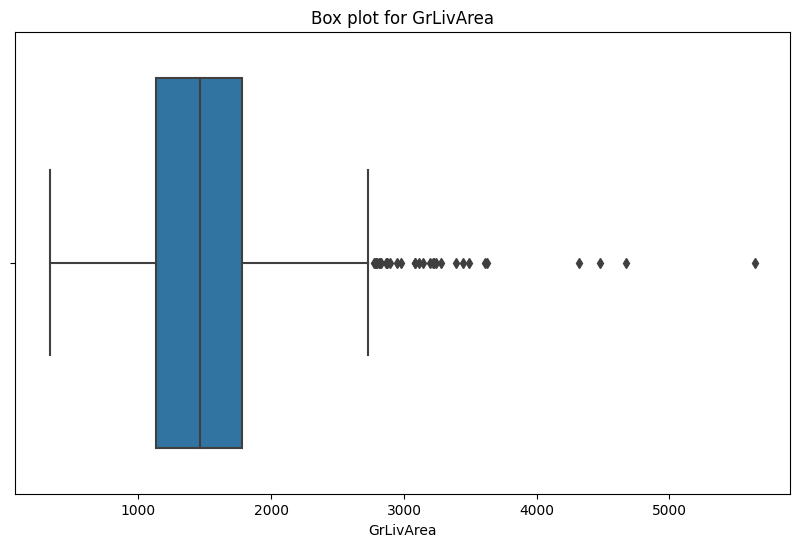

Количество выбросов: 31
      GrLivArea  SalePrice
58         2945     438780
118        3222     320000
185        3608     475000
197        3112     235000
231        2794     403000
304        3493     295000
324        2978     242000
496        3228     430000
523        4676     184750
583        2775     325000
608        3194     359100
635        3395     200000
691        4316     755000
769        3279     538000
798        3140     485000
803        2822     582933
961        2872     272000
1024       2898     287000
1031       3082     197000
1046       2868     556581
1142       2828     424870
1169       3627     625000
1173       3086     200500
1175       2872     285000
1182       4476     745000
1268       3447     381000
1298       5642     160000
1312       2810     302000
1328       2792     256000
1353       3238     410000
1386       2784     250000
Корреляция между GrLivArea и SalePrice:
           GrLivArea  SalePrice
GrLivArea   1.000000   0.708624
SalePric

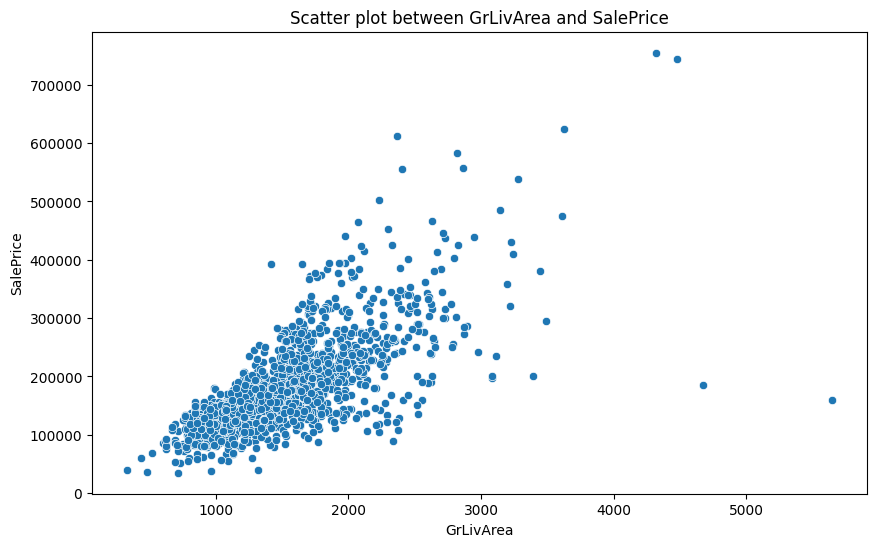

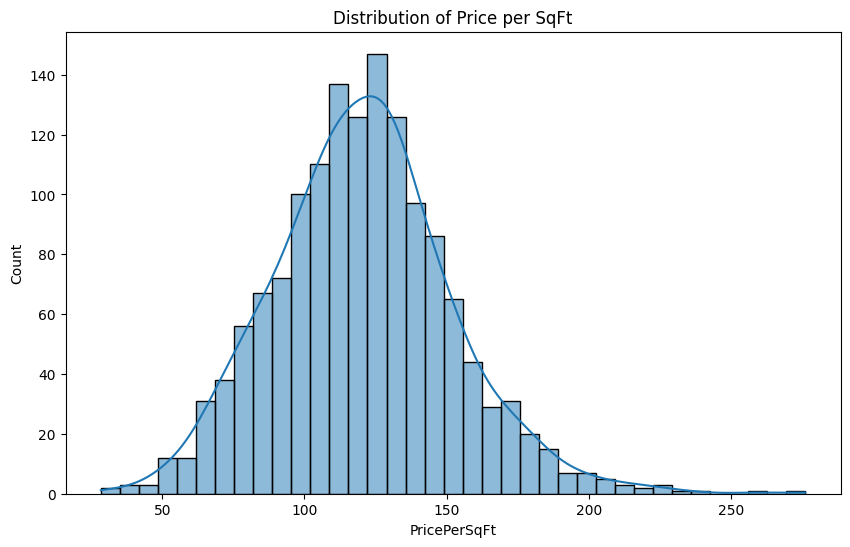

Корреляция нового признака (PricePerSqFt) с ценой дома:               PricePerSqFt  SalePrice
PricePerSqFt      1.000000   0.575505
SalePrice         0.575505   1.000000


In [5]:
# Выбираем колонку с жилой площадью
column = 'GrLivArea'

# Строим диаграмму размаха
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title(f'Box plot for {column}')
plt.show()

# Выявляем аномальные значения (выбросы)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выводим строки с выбросами
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")
print(outliers[[column, 'SalePrice']])

# Гипотеза: большие значения GrLivArea могут быть связаны с аномально низкими ценами на дома,
# что может говорить о том, что эти дома нуждаются в ремонте или находятся в неблагоприятных районах.

# Проверим корреляцию между GrLivArea и SalePrice
correlation = df[[column, 'SalePrice']].corr()
print("Корреляция между GrLivArea и SalePrice:")
print(correlation)

# Выводим диаграмму рассеяния для визуальной проверки гипотезы
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[column], y=df['SalePrice'])
plt.title(f'Scatter plot between {column} and SalePrice')
plt.show()

# Проверка гипотезы о возможности создания синтетического признака
# Пример: создадим новый признак - стоимость одного квадратного метра.
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']

# Анализ нового признака
plt.figure(figsize=(10, 6))
sns.histplot(df['PricePerSqFt'], kde=True)
plt.title('Distribution of Price per SqFt')
plt.show()

print(f"Корреляция нового признака (PricePerSqFt) с ценой дома: {df[['PricePerSqFt', 'SalePrice']].corr()}")


1. Box Plot (Ящик с усами для GrLivArea): На диаграмме видно, что есть несколько явных выбросов в правой части распределения. Значения жилой площади (GrLivArea) больше 4000 квадратных футов являются аномальными, так как они значительно превышают типичные значения для данного набора данных.

2. Scatter Plot (Диаграмма рассеяния GrLivArea и SalePrice): Диаграмма показывает положительную корреляцию между жилой площадью (GrLivArea) и ценой дома (SalePrice). То есть, чем больше жилая площадь, тем выше цена дома. Однако некоторые точки в правой части графика (GrLivArea > 4000) показывают, что дома с очень большой жилой площадью не всегда пропорционально дороже. Эти точки могут указывать на возможные выбросы или необычные случаи.

Гипотеза: Дома с большой жилой площадью (выше 4000 кв. футов), которые имеют непропорционально низкую цену, могут находиться в плохом состоянии или в менее престижных районах, что и объясняет такую низкую цену.

3. Распределение синтетического признака PricePerSqFt (цена за квадратный фут): Распределение этого признака имеет нормальную форму, что подтверждает его полезность для дальнейшего анализа. Цена за квадратный фут (PricePerSqFt) коррелирует с ценой продажи (SalePrice) на уровне 0.575, что указывает на значительную, но не полную зависимость. Дома с высокой жилой площадью могут иметь меньшую цену за квадратный фут, что подтверждает гипотезу о том, что большие дома не всегда стоят пропорционально больше.

Вывод: Созданный синтетический признак (PricePerSqFt) показывает, что цена за квадратный фут имеет умеренную корреляцию с общей ценой дома, что поддерживает гипотезу о том, что аномалии могут быть вызваны состоянием дома или другими факторами, влияющими на конечную цену.